In [12]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering 
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
import random as rd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

class CustomAHC(object):
    
    def __init__(self, filename, n_cluster = 4):
        self.dataset_raw = pd.read_excel(filename)
        self.dataset = self.dataset_raw[["BookingMonth", "DestinationCity", "Product", "GrossWt", "VolumeWt"]]
        self.dataset.columns = ["M01", "M02", "M03", "M04", "M05"]
        self.serial_numbers = [x for x in self.dataset_raw["SNo"]]
        self.n_cluster = n_cluster
        self.X = None
        self.labels = list()
    
    def transform(self):
        d = self.dataset.fillna(0)
        result = list()
        for i, row in d.iterrows():
            v1 = 0
            v2 = 0
            for x in range(1,3):
                v1 += row[f"M0{x}"]
            for x in range(4,6):
                v2 += row[f"M0{x}"]
            result.append([(v1 * (10 + rd.random()) / 2), (v2 * (10 + rd.random()) / 2)])
        self.X = pd.DataFrame(result).to_numpy()
        return self.X
    
    def get_cluster(self):
        model = AgglomerativeClustering(n_clusters=self.n_cluster, affinity='euclidean', linkage = 'single')
        model.fit(self.X)
        self.labels = model.labels_
        return model
    
    def plot(self):
        label = range(1, 11)
        plt.figure(figsize=(20, 10))
        plt.subplots_adjust(bottom=0.1)
        scatter = list()
        legends = list()
        for i in range(1, self.n_cluster):
            scatter.append(plt.scatter(self.X[self.labels == i, 0], self.X[self.labels == i, 1], s=30, label=str(i)))
            legends.append(f"Cluster {i}")
        plt.legend(scatter, legends, scatterpoints=1, loc="lower left", ncol=3, fontsize=20)
        plt.savefig("plot.png")
        return plt.show()
    
    def get_result(self):
        list_df = list()
        self.dataset_raw["Label"] = self.labels
        for i in range(self.n_cluster):
            df = self.dataset_raw[self.dataset_raw["Label"] == i]
            list_df.append(df)
        return list_df

In [36]:
data = CustomAHC(filename="datafix.xlsx", n_cluster=2)
X = data.transform()
pd.DataFrame(X)

,0,1
0,76.329580,53.216949
1,197.652421,10.754591
2,498.887434,15.030427
3,428.176566,10.461002
4,411.476071,10.997547
...,...,...
4319,480.657847,45.675160
4320,325.624674,10.382193
4321,428.845067,10.133155
4322,523.241527,10.726754


In [37]:
data.get_cluster()

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

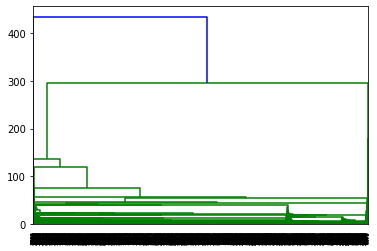

In [44]:
dendrogram = sch.dendrogram(sch.linkage(X, method="single"))
plt.savefig("dendrogram.png")

In [16]:
# data.plot()

In [38]:
results = data.get_result()
results[0]

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus,Label
0,110459075,2018-03-01,3,JOG-1932,10-17-1617709,DEE,JOG31,12,NaN,2,7,3,PRODUCT COSMETICS NON LIQUID,RECEIPT BY RIA .,0
1,110459088,2018-03-01,3,JOG-1932,10-17-1617711,DEE,JOG31,35,NaN,2,1,1,PRODUCT COSMETICS NON LIQUID,RECEIPT BY NURFAN .,0
2,110459140,2018-03-01,3,JOG-1932,10-17-1617647,MEC ARTUR,JOG31,92,NaN,2,2,1,ACCESSORIES,RECEIPT BY ANDRY TRIAS .,0
3,110459171,2018-03-01,3,JOG-1932,11-18-315622,MELVIN,JOG31,81,NaN,1,1,1,ACCESSORIES,RECEIPT BY SANCHIA AHULUHELUW .,0
4,110459198,2018-03-01,3,JOG-1932,10-17-1617708,VINDY SHOP,JOG31,74,NaN,2,1,1,PRODUCT COSMETICS NON LIQUID,RECEIPT BY HESTI .,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,112061999,2018-08-31,8,JOG-1932,11-18-1571389,GABY TUAMAHU,JOG31,81,NaN,2,5,4,CLOTHING/GARMENT,RECEIPT BY RIZAL T .,0
4320,112062448,2018-08-31,8,JOG-1932,11-18-1571740,CV BAA,JOG31,52,NaN,2,1,1,ELECTRONIC SPARE PARTS,RECEIPT BY RONALD .,0
4321,112062913,2018-08-31,8,JOG-1932,11-18-1572100,ELA ARITIA,JOG31,72,NaN,2,1,1,CLOTHING/GARMENT,RECEIPT BY FITRIAWATI .,0
4322,112064013,2018-08-31,8,JOG-1932,11-18-1572732,SONY,JOG31,91,NaN,2,1,1,CLOTHING/GARMENT,RECEIPT BY FEBRIAN P W .,0


In [39]:
results[1]

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus,Label
1805,111005606,2018-05-15,5,JOG-1932,11-18-789020,PT MOLAY SATRYA INDONESIA,JOG31,31,NaN,2,119,125,CLOTHING/GARMENT,RECEIPT BY YOKO(CSG) .,1


In [40]:
from sklearn import metrics

In [41]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(data.X, data.labels, metric='euclidean'))

Silhouette Coefficient: 0.856
